# Final Assessment Scratch Pad

## Instructions

1. Please use only this Jupyter notebook to work on your model, and **do not use any extra files**. If you need to define helper classes or functions, feel free to do so in this notebook.
2. This template is intended to be general, but it may not cover every use case. The sections are given so that it will be easier for us to grade your submission. If your specific use case isn't addressed, **you may add new Markdown or code blocks to this notebook**. However, please **don't delete any existing blocks**.
3. If you don't think a particular section of this template is necessary for your work, **you may skip it**. Be sure to explain clearly why you decided to do so.

## Report

In [486]:
'''
Overview
I used a convolution neural network

1. Descriptive Analysis
From looking at the labels converting to a pd.Dataframe and using .describe(), I ascertained that 
- There was an overwhelming majority of 0 classes, with few 1s and even less 2s. Meaning class imbalance will be an issue to be addressed
- There were the prescence of NaN results.
From the image files, I found that
- Values tended to hover around 0,255, with the presence of massive outliers
- There were the presence of NaN results

2. Detection and Handling of Missing Values
I decided to drop all images with NaN result rows, which accounted for ~10% of the data, which while not negligable is not
sizable enough to warrant the computational cost of predicting values, and filling with the mode when the data is already imbalanced is impractical.

For NaN values in the image batch, I aim to replace nan values with 0, as a nan value represents a third of a pixel in a 16x16 image, 
not sufficient enough of a percentage of the image to warrant dropping the entire image.

3. Detection and Handling of Outliers
Outliers were certainly present (known from descriptive analysis, min and max << or >> mean, or even 1st/3rd quartile values

4. Detection and Handling of Class Imbalance
Based on the descriptive analysis stage, it was very clear that the classes were extremely unbalanced. In order to handle this I considered several approaches
    Oversampling: The method I ended up using, tradeoff that it is not able to capture the patterns in 2 and 1 particularly well as they were duplicated
                  many times over
    Undersampling: As the test data mirrors the distribution of the training data, I decided that sacrificing the ability to capture the majority class's
                   patterns would be far more detrimental to accuracy than oversampling, although it would address the class imbalance problem
                   
5. Understanding Relationship Between Variables
Due to my CNN approach, Finding and modifying/removing corelated data was not necessary/possible due to the spatial-exploiting nature of CNNs.

6. Data visualization[CELL BELOW]
As i clipped the values to 0, 255 I plotted the first 4 values (that represented a 0, 1, 2, and NaN) using mtplot, but nothing of note can be observed

7. General Preprocessing
Image Processing:
    set all nan values to 0
    clip values strictly to range 0,255. The reasoning behind 0, 255 is that it is the standard values for image pixel rgb values, while
    the data may not necessarily be in rgb, The data hovered around that range, and clipping to 0, 255 could help in data visualization as it can be 
    converted to images.
    did not perform normalization using z-score or interquartile range as my model uses batch normalization layers that help perform that for me

8. Feature Selection + 9. Feature Engineering
Initially, I considered PCA dimensionality reduction followed by neural network, but as the data input is an image I decided to choose CNN.
As I opted for a CNN architecture that is designed to exploit the spatial features of an image, PCA/dimensionality reduction is not beneficial to my model.
In a sense, CNN performs feature selection+engineering by detecting patterns during the training loop.

10. Creating Models + 11.Evalutation
MODEL 1: CNN with Adam, dropout, clipping
My initial attempt used a basic Convolution Neural Network using the nn.module() class. My initial design followed closely to the that of PS7 that being
conv2d -> maxpool -> ReLU -> ... flatten -> Linear -> Linear -> softmax -> 3 classes using dropout along the way to obtain probabilities
As i inherited from nn.module, i implemented forward by piecing together all the layers together in correct sequence
for fit(X, y), I followed the following procedure:
    Preprocess X and y
    Convet X and y into tensors
    using an optimizer (Adam) , train the model for a fixed amount of epochs
    return the model

As for predict, I did the following:
    run forward onto the input
    obtain a N row 2d matrice with 3 values each s.t. higher value implies higher probability that the value is the class [index]
    use torch.argmax to obtain the index of the max probability, obtaining my predictions

UNUSED MODEL + Variations
PCA -> MLP Classifier: Recquires a lot more preprocessing as non-convnet nns dont utilize spatialinformation, pca results in loss in information regarding 
dimensions as well, leading to very inaccurate results CNN much better in terms of F1 score despite taking a bit more time
*unused PCA model is under workings -> step 11

Random transformations: Considered adding random transformations to the images during training to introduce variance, but mixture of runtime increasing
drastically as well as loss in accuracy led to me not using it 


12. Hyperparameters Search
I used (non-exchaustive) grid search, iteratively looping through learning rates, dropout rates, and layers in linear layer for 3-5 values each in order
to determine what specific values were good. While there is a probabilistic element (model returns 0.72 then 0.42 the next run without changing anything)
likely due to the random element in dropout layers, I found ~good values of lr = 0.001, dropout = 0.3, layers = 1024 that tended to yield the best result
*Code for grid search is under working-> q12
In order to carry out the grid search, I made tables of different values and looped through each combination of each hyperparam value, building a model 
those hyperparams and returning F1 score.

Conclusion
The most important/helpful thing was inferring that because the data is in the form of images, CNNs that exploit the spatial nature of images would be
good as it handles many aspects such as feature engineering+selection during the training process.

Chat-GPT conversation
https://chat.openai.com/share/64bab8df-7c17-4829-813e-c522043d4614

'''

"\nOverview\nI used a convolution neural network\n\n1. Descriptive Analysis\nFrom looking at the labels, I ascertained that \n- There was an overwhelming majority of 0 classes, with few 1s and even less 2s. Meaning class imbalance will be an issue to be addressed\n- There were the prescence of NaN results.\nFrom the image files, I found that\n- Values tended to hover around 0,255, with the presence of massive outliers\n- There were the presence of NaN results\n\n2. Detection and Handling of Missing Values\nI decided to drop all images with NaN result rows, which accounted for ~10% of the data, which while not negligable is not\nsizable enough to warrant the computational cost of predicting values, and filling with the mode when the data is already imbalanced is impractical.\n\nFor NaN values in the image batch, I aim to replace nan values with 0, as a nan value represents a third of a pixel in a 16x16 image, \nnot sufficient enough of a percentage of the image to warrant dropping the e

In [ ]:
#descriptive analysis

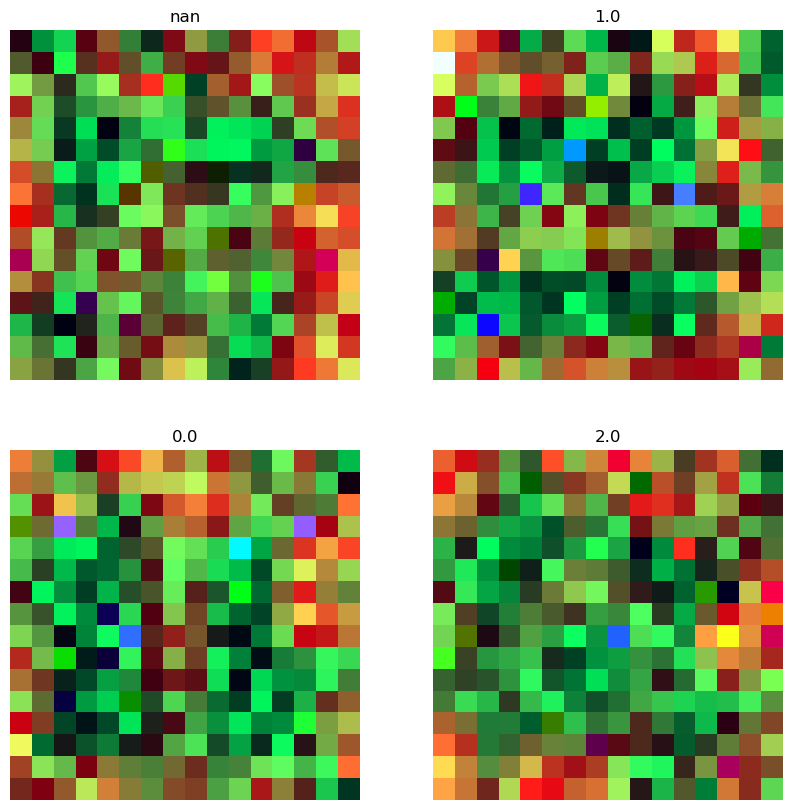

In [515]:
#image visualisation
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))

for i, ax in enumerate(axes.flat):
    img = np.transpose(images[i], (1, 2, 0)) / 255
    img = img.astype('float32')
    ax.imshow(img)
    ax.axis('off')  # Turn off axis numbers
    ax.set_title(labels[i])

plt.show()

---

# Workings (Not Graded)

You will do your working below. Note that anything below this section will not be graded, but we might counter-check what you wrote in the report above with your workings to make sure that you actually did what you claimed to have done. 

## Import Packages

Here, we import some packages necessary to run this notebook. In addition, you may import other packages as well. Do note that when submitting your model, you may only use packages that are available in Coursemology (see `main.ipynb`).

In [501]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt

## Load Dataset

The dataset `data/images.npy` is of size $(N, C, H, W)$, where $N$, $C$, $H$, and $W$ correspond to the number of data, image channels, image width, and image height, respectively.

A code snippet that loads the data is provided below.

### Load Image Data

In [570]:
with open('data.npy', 'rb') as f:
    data = np.load(f, allow_pickle=True).item()
    images = data['image']
    labels = data['label']
    
print('Shape:', images.shape)
print('Labels:', labels.shape)


Shape: (2911, 3, 16, 16)
Labels: (2911,)


## Data Exploration & Preparation

### 1. Descriptive Analysis

In [572]:
df = pd.DataFrame(labels)
mean = df.mean()
std = df.std()
print('mean: ', mean[0])
print('std: ', std[0])
print(df.value_counts())
print('nan results: ', df.isna().sum().sum())

n, c, h, w = images.shape

#flatten all channels to make pandas dataframe of images
images_flatten = images.reshape(n, c, -1)
reshaped_flattened = images_flatten.reshape(images_flatten.shape[0], -1)
print(reshaped_flattened.shape)
df_img = pd.DataFrame(reshaped_flattened)
df_img

mean:  0.09656
std:  0.3262
0.0    2392
1.0     203
2.0      25
dtype: int64
nan results:  291
(2911, 768)


,0,1,2,3,4,5,6,7,8,9,...,758,759,760,761,762,763,764,765,766,767
0,36.0,NaN,20.0,88.0,145.0,52.0,14.0,128.0,144.0,60.0,...,60.406250,77.43750,91.68750,58.843750,28.15625,37.15625,24.750000,35.281250,54.187500,89.25000
1,253.0,240.0,205.0,99.0,6.0,66.0,93.0,0.0,27.0,NaN,...,43.031250,57.00000,61.62500,23.515625,27.84375,20.09375,18.546875,21.656250,90.187500,50.15625
2,237.0,148.0,3.0,78.0,213.0,251.0,240.0,176.0,158.0,188.0,...,61.031250,40.25000,36.84375,66.937500,82.75000,24.43750,57.000000,27.546875,78.687500,33.43750
3,237.0,208.0,151.0,88.0,46.0,7456.0,133.0,207.0,241.0,233.0,...,47.375000,52.03125,92.31250,23.812500,72.81250,44.28125,55.750000,54.187500,30.328125,83.31250
4,78.0,-3164.0,106.0,122.0,123.0,72.0,80.0,213.0,247.0,176.0,...,94.812500,59.78125,35.90625,26.921875,64.75000,76.50000,68.437500,46.125000,77.125000,61.93750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2906,145.0,178.0,225.0,151.0,63.0,99.0,142.0,149.0,6812.0,215.0,...,83.312500,24.75000,93.87500,88.000000,42.12500,77.75000,20.406250,53.593750,51.406250,65.68750
2907,122.0,119.0,121.0,163.0,210.0,225.0,211.0,157.0,130.0,131.0,...,26.296875,51.71875,50.78125,75.250000,62.56250,73.75000,80.250000,39.937500,66.000000,51.09375
2908,44.0,38.0,27.0,4.0,-5088.0,23.0,60.0,87.0,150.0,241.0,...,86.437500,96.06250,76.50000,67.812500,34.37500,37.46875,66.937500,23.515625,64.750000,64.75000
2909,129.0,161.0,217.0,226.0,198.0,112.0,51.0,57.0,45.0,17.0,...,56.375000,47.68750,31.56250,30.015625,48.93750,23.81250,31.562500,75.562500,30.640625,32.81250


### 2. Detection and Handling of Missing Values

In [474]:
#remove rows where result is nan using a mask
nan = np.isnan(labels)
nan_indexes = np.argwhere(np.isnan(labels)).squeeze()
mask = np.ones(labels.shape, bool)
mask[nan_indexes] = False

labels = labels[mask]
images_flatten = images_flatten[mask]
print(labels.shape)
print(images_flatten.shape)
#update n 
n  = images_flatten.shape[0]

(2620,)
(2620, 3, 256)


In [475]:
df = pd.DataFrame(labels)
mean = df.mean()
std = df.std()
print('mean: ', mean[0])
print('std: ', std[0])
print(df.value_counts())
print('nan results: ', df.isna().sum().sum())


mean:  0.09656
std:  0.3262
0.0    2392
1.0     203
2.0      25
dtype: int64
nan results:  0


In [413]:
#fill nan values in image data with 0
images_flatten = np.nan_to_num(images_flatten)

### 3. Detection and Handling of Outliers

In [504]:
#remove nans and clip values
images = np.clip(np.nan_to_num(images), 0, 255)

In [414]:
#flatten all channels to make pandas dataframe of images
reshaped_flattened = images_flatten.reshape(images_flatten.shape[0], -1)
print(reshaped_flattened.shape)
df_img = pd.DataFrame(reshaped_flattened)
df_img

(2620, 768)


,0,1,2,3,4,5,6,7,8,9,...,758,759,760,761,762,763,764,765,766,767
0,253.0,240.0,205.0,99.0,6.0,66.0,93.0,0.0,27.0,0.0,...,43.031250,57.000000,61.62500,23.515625,27.843750,20.09375,18.546875,21.656250,90.187500,50.15625
1,237.0,148.0,3.0,78.0,213.0,251.0,240.0,176.0,158.0,188.0,...,61.031250,40.250000,36.84375,66.937500,82.750000,24.43750,57.000000,27.546875,78.687500,33.43750
2,237.0,208.0,151.0,88.0,46.0,7456.0,133.0,207.0,241.0,233.0,...,47.375000,52.031250,92.31250,23.812500,72.812500,44.28125,55.750000,54.187500,30.328125,83.31250
3,78.0,-3164.0,106.0,122.0,123.0,72.0,80.0,213.0,247.0,176.0,...,94.812500,59.781250,35.90625,26.921875,64.750000,76.50000,68.437500,46.125000,77.125000,61.93750
4,0.0,23.0,101.0,152.0,174.0,137.0,91.0,52.0,54.0,95.0,...,83.937500,19.796875,63.18750,86.125000,29.703125,48.62500,49.875000,65.375000,95.750000,34.37500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2615,145.0,178.0,225.0,151.0,63.0,99.0,142.0,149.0,6812.0,215.0,...,83.312500,24.750000,93.87500,88.000000,42.125000,77.75000,20.406250,53.593750,51.406250,65.68750
2616,122.0,119.0,121.0,163.0,210.0,225.0,211.0,157.0,130.0,131.0,...,26.296875,51.718750,50.78125,75.250000,62.562500,73.75000,80.250000,39.937500,66.000000,51.09375
2617,44.0,38.0,27.0,4.0,-5088.0,23.0,60.0,87.0,150.0,241.0,...,86.437500,96.062500,76.50000,67.812500,34.375000,37.46875,66.937500,23.515625,64.750000,64.75000
2618,129.0,161.0,217.0,226.0,198.0,112.0,51.0,57.0,45.0,17.0,...,56.375000,47.687500,31.56250,30.015625,48.937500,23.81250,31.562500,75.562500,30.640625,32.81250


In [415]:
#use quartiles and IQR to detect outliers, withinLimit represents a dataframe where True if within limit and False if outlier
Q1 = df_img.quantile(0.25)
Q3 = df_img.quantile(0.75)
InterquartileRange = Q3 - Q1
lowerLim = Q1 - 1.5 * InterquartileRange
upperLim = Q3 + 1.5 * InterquartileRange
withinLimit = (df_img >= lowerLim) & (df_img <= upperLim)
withinLimit

,0,1,2,3,4,5,6,7,8,9,...,758,759,760,761,762,763,764,765,766,767
0,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,False,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
3,True,False,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2615,True,True,True,True,True,True,True,True,False,True,...,True,True,True,True,True,True,True,True,True,True
2616,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
2617,True,True,True,True,False,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
2618,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True


In [416]:
#replace outliers with 0
median = df_img.median(axis = 0)
df_img = df_img.where(withinLimit, 0, axis = 0)
df_img

,0,1,2,3,4,5,6,7,8,9,...,758,759,760,761,762,763,764,765,766,767
0,253.0,240.0,205.0,99.0,6.0,66.0,93.0,0.0,27.0,0.0,...,43.031250,57.000000,61.62500,23.515625,27.843750,20.09375,18.546875,21.656250,90.187500,50.15625
1,237.0,148.0,3.0,78.0,213.0,251.0,240.0,176.0,158.0,188.0,...,61.031250,40.250000,36.84375,66.937500,82.750000,24.43750,57.000000,27.546875,78.687500,33.43750
2,237.0,208.0,151.0,88.0,46.0,0.0,133.0,207.0,241.0,233.0,...,47.375000,52.031250,92.31250,23.812500,72.812500,44.28125,55.750000,54.187500,30.328125,83.31250
3,78.0,0.0,106.0,122.0,123.0,72.0,80.0,213.0,247.0,176.0,...,94.812500,59.781250,35.90625,26.921875,64.750000,76.50000,68.437500,46.125000,77.125000,61.93750
4,0.0,23.0,101.0,152.0,174.0,137.0,91.0,52.0,54.0,95.0,...,83.937500,19.796875,63.18750,86.125000,29.703125,48.62500,49.875000,65.375000,95.750000,34.37500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2615,145.0,178.0,225.0,151.0,63.0,99.0,142.0,149.0,0.0,215.0,...,83.312500,24.750000,93.87500,88.000000,42.125000,77.75000,20.406250,53.593750,51.406250,65.68750
2616,122.0,119.0,121.0,163.0,210.0,225.0,211.0,157.0,130.0,131.0,...,26.296875,51.718750,50.78125,75.250000,62.562500,73.75000,80.250000,39.937500,66.000000,51.09375
2617,44.0,38.0,27.0,4.0,0.0,23.0,60.0,87.0,150.0,241.0,...,86.437500,96.062500,76.50000,67.812500,34.375000,37.46875,66.937500,23.515625,64.750000,64.75000
2618,129.0,161.0,217.0,226.0,198.0,112.0,51.0,57.0,45.0,17.0,...,56.375000,47.687500,31.56250,30.015625,48.937500,23.81250,31.562500,75.562500,30.640625,32.81250


In [417]:
#reconstruct image_flatten using dataframe
reconstructed = df_img.to_numpy().reshape(n, c, h*w)
print(images_flatten.shape)
reconstructed.shape


(2620, 3, 256)


(2620, 3, 256)

### 4. Detection and Handling of Class Imbalance

In [418]:
zeroClass = df.value_counts()[0]
oneClass = df.value_counts()[1]
twoClass = df.value_counts()[2]

#2:1:1 ratio is acceptable where imbalanced data shouldn't be a problem.
n = (int) (zeroClass / 2)
print(n)

1196


In [419]:
#Oversample 1 and 2 s.t. 2 : 1 : 1 ratio is achieved
zeros = df[df[0] == 0]
ones = df[df[0] == 1]
twos = df[df[0] == 2]
ones = ones.sample(n=(int)(zeroClass/2), replace=True)
twos = twos.sample(n=(int)(zeroClass/2), replace=True)

In [420]:
df = pd.concat([zeros, ones, twos], axis = 0)
df.value_counts()

0.0    2392
1.0    1196
2.0    1196
dtype: int64

Int64Index([   1,    5,    7,    9,   10,   11,   12,   13,   14,   15,
            ...
            2121, 1600,   31, 2458,   46, 1159,  749, 1706,  636, 2071],
           dtype='int64', length=4784)
(4784, 3, 16, 16)
(4784, 1)


### 5. Understanding Relationship Between Variables

### 6. Data Visualization

nan
1.0
0.0
2.0


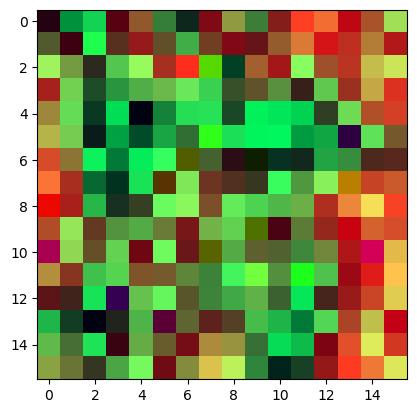

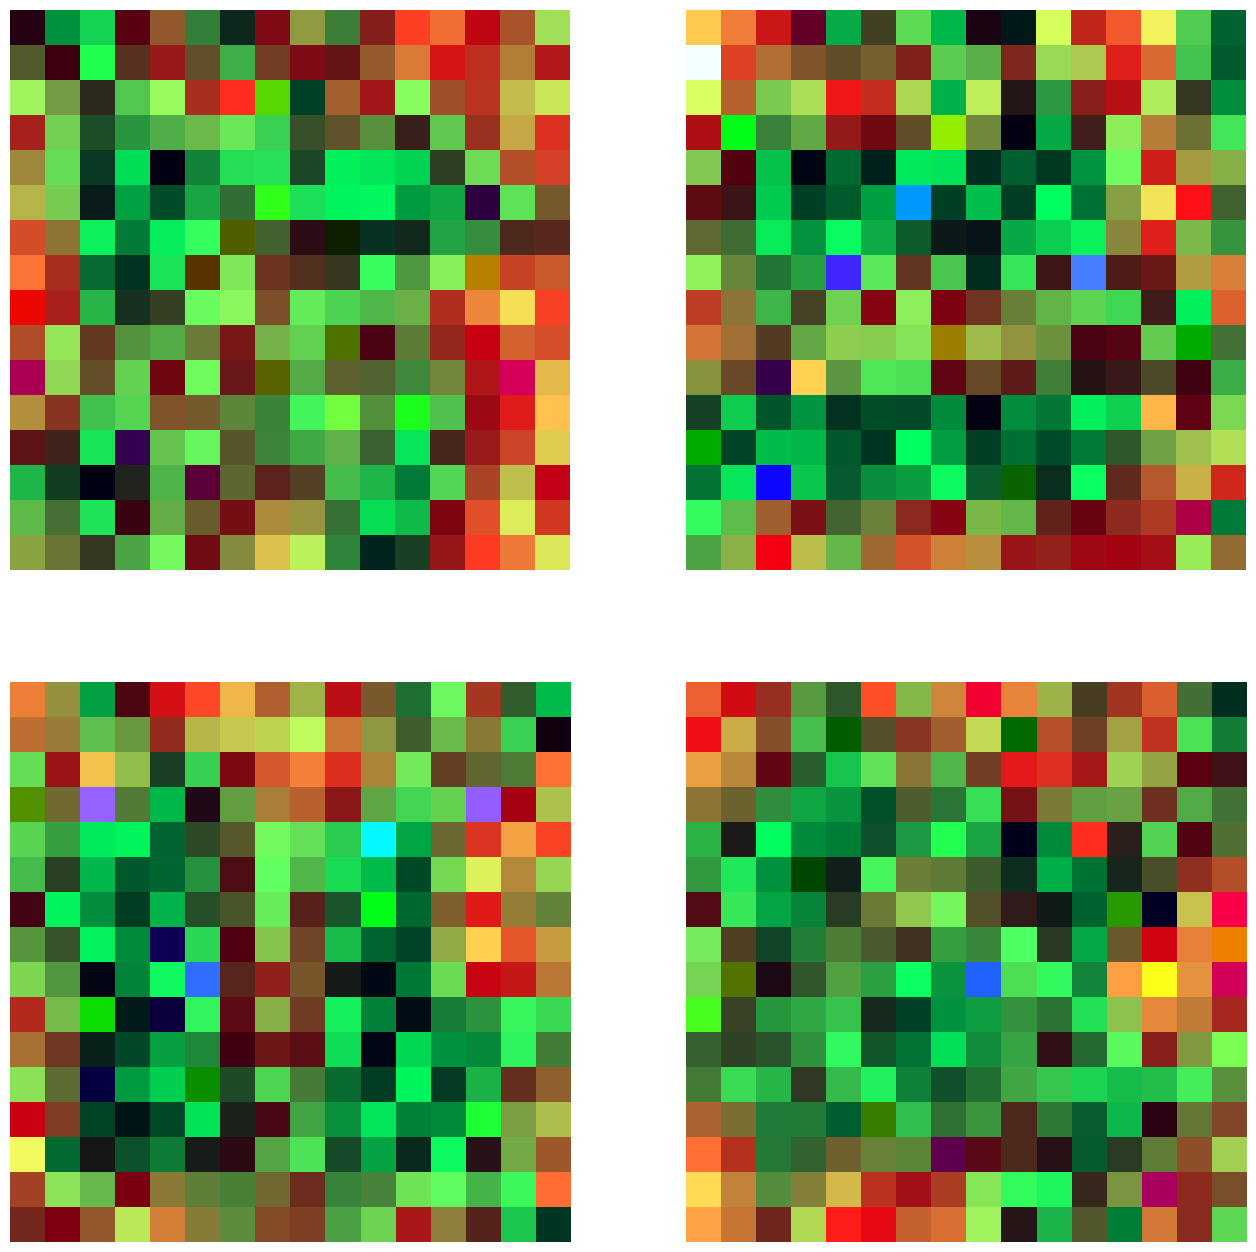

In [511]:


images_transposed = np.transpose(images[0], (1, 2, 0)) / 255
imagetoshow = images_transposed.astype('float32')
plt.imshow(imagetoshow)

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 16))

for i, ax in enumerate(axes.flat):
    img = np.transpose(images[i], (1, 2, 0)) / 255
    img = img.astype('float32')
    ax.imshow(img)
    ax.axis('off')  # Turn off axis numbers
    print(labels[i])

plt.show()

## Data Preprocessing

### 7. General Preprocessing

In [426]:
images_flatten = np.clip(images_flatten, 0, 255)

array([[[253.  , 240.  , 205.  , ..., 166.  , 153.  , 146.  ],
        [202.  , 126.  ,  23.  , ...,  15.  , 236.  , 107.  ],
        [ 79.6 ,  56.06,  24.12, ...,  21.66,  90.2 ,  50.16]],

       [[237.  , 148.  ,   3.  , ...,  86.  ,  27.  ,   0.  ],
        [126.  , 144.  , 161.  , ...,  34.  , 199.  ,  53.  ],
        [ 56.06,  61.62,  66.94, ...,  27.55,  78.7 ,  33.44]],

       [[237.  , 208.  , 151.  , ..., 210.  , 138.  ,  93.  ],
        [ 97.  ,  12.  ,  46.  , ..., 120.  ,  43.  , 214.  ],
        [ 47.06,  20.72,  31.27, ...,  54.2 ,  30.33,  83.3 ]],

       ...,

       [[ 44.  ,  38.  ,  27.  , ...,  71.  ,  32.  ,   8.  ],
        [ 95.  , 168.  , 108.  , ...,  21.  , 154.  , 154.  ],
        [ 46.44,  69.06,  50.47, ...,  23.52,  64.75,  64.75]],

       [[129.  , 161.  , 217.  , ..., 227.  , 212.  , 201.  ],
        [216.  , 123.  ,  31.  , ..., 189.  ,  44.  ,  51.  ],
        [ 83.94,  55.12,  26.61, ...,  75.56,  30.64,  32.8 ]],

       [[ 64.  , 110.  , 183.  ,

### 8. Feature Selection

### 9. Feature Engineering

## Modeling & Evaluation

### 10. Creating models

### 10 + 11. Model Creation and Evaluation 

In [5]:
#CNN Neural Network with Adam
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import datasets, transforms
from torch.utils.data import Dataset, DataLoader, TensorDataset
class ModelCNNAdam(nn.Module):  
    """
    This class represents an AI model.
    """
    
    def __init__(self):
        super(Model, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, 2)
        self.conv2 = nn.Conv2d(32, 64, 3)
        self.pool = nn.MaxPool2d(2)
        self.relu = nn.LeakyReLU(0.1)
        self.l1 = nn.Linear(256, 1024)
        self.l2 = nn.Linear(1024, 3)
        self.norm1 = nn.BatchNorm2d(32)
        self.norm2 = nn.BatchNorm2d(64)
        self.dropout = nn.Dropout(p = 0.3)
    def forward(self, x):
        x = self.pool(self.relu(self.norm1(self.conv1(x))))
        x = self.pool(self.relu(self.norm2(self.conv2(x))))
        x = x.view(x.shape[0], -1)
        x = self.relu(self.l1(x))
        x = self.dropout(self.relu(self.l2(x)))
        return x
    def fit(self, X, y):
        """
        Train the model using the input data.
        
        Parameters
        ----------
        X : ndarray of shape (n_samples, channel, height, width)
            Training data.
        y : ndarray of shape (n_samples,)
            Target values.
            
        Returns
        -------
        self : object
            Returns an instance of the trained model.
            
        """
        n, c, h, w = X.shape
        #set NaNs to 0 in image data and clip values to 0,255 to avoid outliers
        images = np.clip(np.nan_to_num(X), 0, 255)
        df = pd.DataFrame(y)
        zeroClass = df.value_counts()[0]
        oneClass = df.value_counts()[1]
        twoClass = df.value_counts()[2]
        zeros = df[df[0] == 0]
        ones = df[df[0] == 1]
        twos = df[df[0] == 2]
        ones = ones.sample(n=(int)(zeroClass), replace=True)
        twos = twos.sample(n=(int)(zeroClass), replace=True)
        df = pd.concat([zeros, ones, twos], axis = 0)
        #Making final X and Y
        finalY = df.to_numpy()
        indicesY = df.index
        finalX = images[indicesY]
        optimizer = torch.optim.Adam(self.parameters(), lr = 0.001)
        loss_fn = nn.CrossEntropyLoss()
        
        Xtrain = torch.tensor(finalX, dtype=torch.float32)
        Ytrain = torch.tensor(finalY, dtype=torch.long).squeeze()
        #Training loop
        for epoch in range(50):
            optimizer.zero_grad()
            output = self(Xtrain)
            loss = loss_fn(output, Ytrain)
            loss.backward()
            optimizer.step()
            if (epoch % 10 == 0):
                print(f'Loss: {loss.item()}')
        return self
    
    def predict(self, X):
        """
        Use the trained model to make predictions.
        
        Parameters
        ----------
        X : ndarray of shape (n_samples, channel, height, width)
            Input data.
            
        Returns
        -------
        ndarray of shape (n_samples,)
        Predicted target values per element in X.
           
        """
        #set nan pixels to 0 and clip to 0, 255
        X = np.clip(np.nan_to_num(X), 0,255)
        X = torch.tensor(X, dtype=torch.float32)
        self.eval()
        
        with torch.no_grad():
            output = self(X)
        return torch.argmax(output, axis = 1)

In [6]:
#CNN Neural Network with SGD (not used)
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import datasets, transforms
from torch.utils.data import Dataset, DataLoader, TensorDataset
class ModelCNNSGD(nn.Module):  
    """
    This class represents an AI model.
    """
    
    def __init__(self):
        super(ModelCNNSGD, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, 2)
        self.conv2 = nn.Conv2d(32, 64, 3)
        self.pool = nn.MaxPool2d(2)
        self.relu = nn.LeakyReLU(0.1)
        self.l1 = nn.Linear(256, 1024)
        self.l2 = nn.Linear(1024, 3)
        self.norm1 = nn.BatchNorm2d(32)
        self.norm2 = nn.BatchNorm2d(64)
        self.dropout = nn.Dropout(p = 0.3)
    def forward(self, x):
        x = self.pool(self.relu(self.norm1(self.conv1(x))))
        x = self.pool(self.relu(self.norm2(self.conv2(x))))
        x = x.view(x.shape[0], -1)
        x = self.relu(self.l1(x))
        x = self.dropout(self.relu(self.l2(x)))
        return x
    def fit(self, X, y):
        """
        Train the model using the input data.
        
        Parameters
        ----------
        X : ndarray of shape (n_samples, channel, height, width)
            Training data.
        y : ndarray of shape (n_samples,)
            Target values.
            
        Returns
        -------
        self : object
            Returns an instance of the trained model.
            
        """
        n, c, h, w = X.shape
        #set NaNs to 0 in image data and clip values to 0,255 to avoid outliers
        images = np.clip(np.nan_to_num(X), 0, 255)
        df = pd.DataFrame(y)
        zeroClass = df.value_counts()[0]
        oneClass = df.value_counts()[1]
        twoClass = df.value_counts()[2]
        zeros = df[df[0] == 0]
        ones = df[df[0] == 1]
        twos = df[df[0] == 2]
        ones = ones.sample(n=(int)(zeroClass), replace=True)
        twos = twos.sample(n=(int)(zeroClass), replace=True)
        df = pd.concat([zeros, ones, twos], axis = 0)
        #Making final X and Y
        finalY = df.to_numpy()
        indicesY = df.index
        finalX = images[indicesY]
        optimizer = torch.optim.SGD(self.parameters(), lr = 0.001)
        loss_fn = nn.CrossEntropyLoss()
        
        Xtrain = torch.tensor(finalX, dtype=torch.float32)
        Ytrain = torch.tensor(finalY, dtype=torch.long).squeeze()
        #Training loop
        for epoch in range(50):
            optimizer.zero_grad()
            output = self(Xtrain)
            loss = loss_fn(output, Ytrain)
            loss.backward()
            optimizer.step()
            if (epoch % 10 == 0):
                print(f'Loss: {loss.item()}')
        return self
    
    def predict(self, X):
        """
        Use the trained model to make predictions.
        
        Parameters
        ----------
        X : ndarray of shape (n_samples, channel, height, width)
            Input data.
            
        Returns
        -------
        ndarray of shape (n_samples,)
        Predicted target values per element in X.
           
        """
        #set nan pixels to 0 and clip to 0, 255
        X = np.clip(np.nan_to_num(X), 0,255)
        X = torch.tensor(X, dtype=torch.float32)
        self.eval()
        
        with torch.no_grad():
            output = self(X)
        return torch.argmax(output, axis = 1)

In [7]:
#PCA MLP NN (not used)

import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import datasets, transforms
from torch.utils.data import Dataset, DataLoader, TensorDataset
from sklearn.decomposition import PCA
class ModelPCA(nn.Module):  
    """
    This class represents an AI model.
    """
    def __init__(self):
        super(ModelPCA, self).__init__()
        self.pca = PCA(n_components = 512)
        self.l1 = nn.Linear(512, 512)
        self.relu = nn.ReLU()
        self.l2 = nn.Linear(512, 128)
        self.l3 = nn.Linear(128, 3)
        self.dropout = nn.Dropout(p=0.2)
    def forward(self, x):
        x = self.dropout(self.relu(self.l1(x)))
        x = self.relu(self.l2(x))
        x = self.l3(x)
        return x

    def fit(self, X, y):
        """
        Train the model using the input data.
        
        Parameters
        ----------
        X : ndarray of shape (n_samples, channel, height, width)
            Training data.
        y : ndarray of shape (n_samples,)
            Target values.
            
        Returns
        -------
        self : object
            Returns an instance of the trained model.
            
        """
        n, c, h, w = X.shape
        df = pd.DataFrame(y)
        flattened = X.reshape(n, -1)
        flattened = np.nan_to_num(flattened)
        flattened = np.clip(flattened, 0, 255)
        #PCA Dimension reduction
        images_reduced = self.pca.fit_transform(flattened)
        #oversampling
        zeroClass = df.value_counts()[0]
        oneClass = df.value_counts()[1]
        twoClass = df.value_counts()[2]
        zeros = df[df[0] == 0]
        ones = df[df[0] == 1]
        twos = df[df[0] == 2]
        ones = ones.sample(n=(int)(zeroClass), replace=True)
        twos = twos.sample(n=(int)(zeroClass), replace=True)
        df = pd.concat([zeros, ones, twos], axis = 0)

        #Making final X and Y
        finalY = df.to_numpy()
        indicesY = df.index
        finalX = images_reduced[indicesY]

        #training
        optimizer = torch.optim.Adam(self.parameters(), lr = 0.001)
        loss_fn = nn.CrossEntropyLoss()
        
        Xtrain = torch.tensor(finalX, dtype=torch.float32)
        Ytrain = torch.tensor(finalY, dtype=torch.long).squeeze()
        for epoch in range(50):
            optimizer.zero_grad()
            output = self(Xtrain)
            loss = loss_fn(output, Ytrain)
            loss.backward()
            optimizer.step()
            if (epoch % 10 == 0):
                print(f'Loss: {loss.item()}')
        return self
    
    def predict(self, X):
        """
        Use the trained model to make predictions.
        
        Parameters
        ----------
        X : ndarray of shape (n_samples, channel, height, width)
            Input data.
            
        Returns
        -------
        ndarray of shape (n_samples,)
        Predicted target values per element in X.
           
        """
        print(X.shape)
        X = np.clip(np.nan_to_num(X), 0, 255).reshape(X.shape[0], -1)
        print(X.shape)
        X_reduced = self.pca.transform(X)
        print(X_reduced.shape)
        X = torch.tensor(X_reduced, dtype=torch.float32)
        self.eval()
        
        with torch.no_grad():
            output = self(X)
        return torch.argmax(output, axis = 1)

In [8]:
# Import packages
import pandas as pd
import numpy as np
import os
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from torch.utils.data import Dataset

In [9]:
# Load data
with open('data.npy', 'rb') as f:
    data = np.load(f, allow_pickle=True).item()
    X = data['image']
    y = data['label']

In [11]:
# Split train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
# Filter test data that contains no labels
# In Coursemology, the test data is guaranteed to have labels
nan_indices = np.argwhere(np.isnan(y_test)).squeeze()
mask = np.ones(y_test.shape, bool)
mask[nan_indices] = False
X_test = X_test[mask]
y_test = y_test[mask]

# Train and predict
modelPCA = ModelPCA()
modelPCA.fit(X_train, y_train)
y_predPCA = model.predict(X_test)

modelCNNAdam = ModelPCA()
modelCNNAdam.fit(X_train, y_train)
y_predCNNAdam = model.predict(X_test)

modelCNNSGD = ModelPCA()
modelCNNSGD.fit(X_train, y_train)
y_predCNNSGD = model.predict(X_test)

# Evaluate model predition
# Learn more: https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics
print("F1 Score (PCA): {0:.2f}".format(f1_score(y_test, y_predPCA, average='macro')))
print("F1 Score (CNN Adam): {0:.2f}".format(f1_score(y_test, y_predCNNAdam, average='macro')))
print("F1 Score (CNN SGD): {0:.2f}".format(f1_score(y_test, y_predCNNSGD, average='macro')))

Loss: 6.082059860229492
Loss: 0.48684126138687134
Loss: 0.08093351870775223
Loss: 0.0020691384561359882
Loss: 0.0006119367317296565


NameError: name 'model' is not defined

In [ ]:
Bonus. Hyperparameter tuning

In [437]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import datasets, transforms
from torch.utils.data import Dataset, DataLoader, TensorDataset
class TestModel(nn.Module):  
    """
    This class represents an AI model.
    """
    
    def __init__(self):
        super(TestModel, self).__init__()
        self.lr = 1e-3
        self.conv1 = nn.Conv2d(3, 32, 2)
        self.conv2 = nn.Conv2d(32, 64, 3)
        self.pool = nn.MaxPool2d(2)
        self.relu = nn.LeakyReLU(0.1)
        self.l1 = nn.Linear(256, 256)
        self.l2 = nn.Linear(256, 3)
        self.norm1 = nn.BatchNorm2d(32)
        self.norm2 = nn.BatchNorm2d(64)
        self.dropout = nn.Dropout(p = 0.1)
        self.softmax = nn.Softmax(1)

    def forward(self, x):
        x = self.pool(self.relu(self.norm1(self.conv1(x))))
        x = self.pool(self.relu(self.norm2(self.conv2(x))))
        x = x.view(x.shape[0], -1)
        x = self.relu(self.l1(x))
        x = self.dropout(self.relu(self.l2(x)))
        return x

    def init2(self, lr, dr, nne):
        self.lr = lr
        self.dropout = nn.Dropout(p = dr)
        self.l1 = nn.Linear(256, nne)
        self.l2 = nn.Linear(nne, 3)
        return self
        
    
    def fit(self, X, y):
        """
        Train the model using the input data.
        
        Parameters
        ----------
        X : ndarray of shape (n_samples, channel, height, width)
            Training data.
        y : ndarray of shape (n_samples,)
            Target values.
            
        Returns
        -------
        self : object
            Returns an instance of the trained model.
            
        """
        n, c, h, w = X.shape
        #set NaNs to 0 in image data and clip values to 0,255 to avoid outliers
        images = np.clip(np.nan_to_num(X), 0, 255)
        df = pd.DataFrame(y)
        zeroClass = df.value_counts()[0]
        oneClass = df.value_counts()[1]
        twoClass = df.value_counts()[2]

        zeros = df[df[0] == 0]
        ones = df[df[0] == 1]
        twos = df[df[0] == 2]
        ones = ones.sample(n=(int)(zeroClass), replace=True)
        twos = twos.sample(n=(int)(zeroClass), replace=True)
        df = pd.concat([zeros, ones, twos], axis = 0)

        #Making final X and Y
        finalY = df.to_numpy()
        indicesY = df.index
        finalX = images[indicesY]

        optimizer = torch.optim.Adam(self.parameters(), lr = self.lr)
        loss_fn = nn.CrossEntropyLoss()
        
        Xtrain = torch.tensor(finalX, dtype=torch.float32)
        Ytrain = torch.tensor(finalY, dtype=torch.long).squeeze()
        #Training loop
        for epoch in range(50):
            optimizer.zero_grad()
            output = self(Xtrain)
            loss = loss_fn(output, Ytrain)
            loss.backward()
            optimizer.step()
            #if (epoch % 10 == 0):
                #print(f'Loss: {loss.item()}')
        return self
    
    def predict(self, X):
        """
        Use the trained model to make predictions.
        
        Parameters
        ----------
        X : ndarray of shape (n_samples, channel, height, width)
            Input data.
            
        Returns
        -------
        ndarray of shape (n_samples,)
        Predicted target values per element in X.
           
        """
        #set nan pixels to 0 and clip to 0, 255
        X = np.clip(np.nan_to_num(X), 0,255)
        X = torch.tensor(X, dtype=torch.float32)
        self.eval()
        
        with torch.no_grad():
            output = self(X)
        return torch.argmax(output, axis = 1)
        #print(torch.argmax(output, dim=1))

        
        

In [463]:
#non-exhaustive grid search for hyperparameters

# Split train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
# Filter test data that contains no labels
# In Coursemology, the test data is guaranteed to have labels
nan_indices = np.argwhere(np.isnan(y_test)).squeeze()
mask = np.ones(y_test.shape, bool)
mask[nan_indices] = False
X_test = X_test[mask]
y_test = y_test[mask]
#initialise hyperparameters
learning_rates = [1e-3, 5e-3, 1e-2]
dropout_rates = [0.1, 0.2, 0.3, 0.4, 0.5]
num_neurons_l1 = [256, 512, 1024]
best_hyperparams = [1e-3, 0.2, 512, 0.0]

for lr in learning_rates:
    for dr in dropout_rates:
        for nne in num_neurons_l1:
            model = TestModel().init2(lr, dr, nne)
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
            score = f1_score(y_test, y_pred, average = 'macro')
            if score > best_hyperparams[3]:
                best_hyperparams[3] = score
                best_hyperparams[0] = lr
                best_hyperparams[1] = dr
                best_hyperparams[2] = nne
                print('new highscore: ', score)
                print(lr, dr, nne)
            else:
                print(score)

print(best_hyperparams)

testing learning rate:  0.001
iteration  0
iteration  1
iteration  2
[0.5266760431317393, 0.527396531545909, 0.5159552845528456]
testing learning rate:  0.005
iteration  0
iteration  1
iteration  2
[0.5039736824962543, 0.5162974280621339, 0.5174238129943045]
testing learning rate:  0.01
iteration  0
iteration  1
iteration  2
[0.3807051282051282, 0.4944919903445249, 0.43748511550369135]
